# Laboratorio 4 - Inteligencia Artificial

## Autores:

- Nelson García
- Andy Fuentes
- Davis Roldan
- Ricardo Chuy
- Diederich Solís

## Task 1 - Preguntas teóricas

#### 1. Grafos Computacionales y su Importancia en Backpropagation

**Grafos Computacionales**: Los grafos computacionales son representaciones gráficas de operaciones matemáticas donde los nodos representan variables o operaciones, y las aristas representan el flujo de datos entre estas operaciones. Son útiles para visualizar y calcular derivadas parciales en redes neuronales, lo que es esencial para el proceso de backpropagation.

**Importancia en Backpropagation**: En el contexto de backpropagation, los grafos computacionales permiten calcular gradientes de manera eficiente. Durante el paso hacia adelante (forward pass), se calculan los valores de las funciones en cada nodo. Durante el paso hacia atrás (backward pass), se calculan los gradientes utilizando la regla de la cadena, lo que permite actualizar los pesos de la red para minimizar el error. Esto es crucial para entrenar redes neuronales de manera efectiva.

#### 2. Componentes y Pasos de una Red Neuronal y Mejoras al Perceptrón

**Componentes de una Red Neuronal**:
- **Capas de Entrada**: Reciben los datos de entrada.
- **Capas Ocultas**: Realizan transformaciones no lineales de las entradas.
- **Capas de Salida**: Producen la salida final.
- **Pesos y Sesgos**: Parámetros que la red ajusta durante el entrenamiento.
- **Función de Activación**: Introduce no linealidades en el modelo (e.g., ReLU, sigmoide).
- **Función de Pérdida**: Mide el error entre las predicciones y los valores reales.
- **Optimizador**: Ajusta los pesos para minimizar la función de pérdida (e.g., SGD, Adam).

**Mejoras al Perceptrón**:
- **Añadir Capas Ocultas**: Para capturar patrones más complejos.
- **Usar Funciones de Activación No Lineales**: Para permitir que la red modele relaciones no lineales.
- **Implementar Regularización**: Para evitar el sobreajuste (e.g., L2, dropout).
- **Utilizar un Optimizador Avanzado**: Como Adam para mejorar la convergencia.

#### 3. Selección del Valor K usando el Método de la Silueta en K-Means

**Método de la Silueta**: Este método evalúa la calidad de los clusters calculando la silueta para cada punto, que mide cuán similar es un punto a su propio cluster en comparación con otros clusters.

**Fórmula de la Silueta**:El método de la silueta se basa en calcular una métrica para cada punto i  en el conjunto de datos. La métrica de silueta s(i) se define como:

![image.png](attachment:image.png)

      Donde:
      - a(i) es la distancia promedio del punto i a todos los demás puntos en el mismo cluster.
      - b(i) es la distancia promedio del punto i a todos los puntos en el cluster más cercano.

**Selección de K**: Se calcula la silueta promedio para diferentes valores de K y se selecciona el K que maximiza esta medida. Un valor de silueta cercano a 1 indica que el punto está bien asignado, mientras que un valor cercano a -1 indica una posible mala asignación.

**Asunciones**: Se asume que los clusters son compactos y bien separados.

#### 4. Principal Component Analysis (PCA) y su Uso con K-Means

**PCA**: Es una técnica de reducción de dimensionalidad que transforma los datos a un espacio de menor dimensión, manteniendo la mayor varianza posible.

**Mejora de Clusters con K-Means**:
- **Reducción de Ruido**: PCA puede eliminar componentes con poca varianza, que a menudo corresponden a ruido.
- **Reducción de Dimensionalidad**: Al reducir la dimensionalidad, PCA puede hacer que K-Means sea más eficiente y menos propenso al problema de la maldición de la dimensionalidad.
- **Visualización**: Facilita la visualización de clusters en 2D o 3D, lo que puede ayudar a entender la estructura de los datos.

Al aplicar PCA antes de K-Means, se puede mejorar la calidad de los clusters al enfocarse en las direcciones de máxima varianza, que suelen contener la información más relevante.

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

#### Task 2.1.1 - K-Means

### Ejercicio realizado 'a mano'

Se importan las librerías a utilizar.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.spatial.distance as metric

Se lee el dataset.

In [ ]:
dataset = pd.read_csv('documents/bank_transactions.csv')

Visualizar los datos.

In [ ]:
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
dataset.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


##### Elección de variables

Saldo de la Cuenta del Cliente (CustAccountBalance)

El saldo de la cuenta es un indicador clave del poder adquisitivo y el comportamiento financiero del cliente. Puede ayudar a distinguir entre clientes de alto, medio y bajo poder adquisitivo, lo que es crucial para segmentación en productos bancarios.

Dinero de la Transacción (TransactionAmount (INR))

Indica el comportamiento de gasto y la frecuencia de uso de la cuenta. Permite diferenciar clientes de alto valor (con altos saldos y transacciones grandes) de clientes más activos pero con saldos menores.

Convertir CustomerDOB a edad de cada cliente

Ahora que se tiene la edad se puede comenzar el proceso de clustering.

In [ ]:
X = dataset.filter(['CustAccountBalance', 'TransactionAmount (INR)'])
X = np.array(X)
X = X[~np.isnan(X).any(axis=1)]  # Eliminar filas con NaN
X = X[~np.isinf(X).any(axis=1)]  # Eliminar filas con Inf

In [ ]:
np.random.seed(42)  # Fijar semilla para resultados reproducibles
X = X[np.random.choice(X.shape[0], 25000, replace=False)]

print(f"Forma de X después de la limpieza: {X.shape}")

X

Forma de X después de la limpieza: (25000, 2)


array([[3.5003000e+04, 3.2500000e+02],
       [7.1649612e+05, 5.1900000e+02],
       [3.1788360e+04, 3.0000000e+01],
       ...,
       [1.9892000e+03, 9.2300000e+02],
       [3.9090750e+04, 1.7900000e+02],
       [6.1421320e+04, 2.0820000e+03]])

In [ ]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data, k, index, centroids, orig_centroids):
    input = np.array(index, dtype=int)  # Asegurar que es un array de enteros

    colors = ["g", "r", "c", "b", "m", "y", "orange", "purple", "pink", "gray"]  # Hasta 10 clusters

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

    # Graficar los puntos según su cluster
    for i in range(k):
        cluster_points = data[input == i]  # Filtrar puntos del cluster i
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    color=colors[i % len(colors)], s=50, alpha=0.6, label=f"Cluster {i+1}")

    # Graficar los centroides finales
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", color="black", s=75,
                edgecolors="white", linewidth=2, label="Centroides Finales")

    # Graficar los centroides originales
    plt.scatter(orig_centroids[:, 0], orig_centroids[:, 1], marker="D", color="blue", s=75,
                edgecolors="white", linewidth=2, label="Centroides Originales")

    # Configurar títulos y etiquetas
    plt.title("Segmentación de Clientes - K-Means", fontsize=14, fontweight="bold")
    plt.xlabel("Saldo de la Cuenta (INR)", fontsize=12)
    plt.ylabel("Monto de la Transacción (INR)", fontsize=12)

    # Agregar la leyenda
    plt.legend()

    # Mostrar la gráfica
    plt.show()



Función principal de k-means

In [ ]:
class K_Means:
    def __init__(self, k, data, centeriod_init=None, max_iter=50, tol=1e-4):
        self.k = k
        self.data = np.array(data)  # Convertir a array de NumPy si aún no lo es
        self.centeriod_init = centeriod_init
        self.max_iter = max_iter
        self.tol = tol  # Umbral de convergencia

    def initialise_centroids(self):
        if self.centeriod_init == 'random':
            initial_centroids = np.random.permutation(self.data.shape[0])[:self.k]
            self.centroids = self.data[initial_centroids]
        elif self.centeriod_init == 'firstk':
            self.centroids = self.data[:self.k]
        else:
            self.centroids = np.array([self.data[i % self.k] for i in range(self.k)])
        return self.centroids

    def fit(self):
        m = self.data.shape[0]
        cluster_assignments = np.zeros((m, 2))

        self.centroids = self.initialise_centroids()
        orig_centroids = self.centroids.copy()  # Guardar los centroides originales
        prev_centroids = np.zeros_like(self.centroids)

        changed = True
        num_iter = 0

        while changed and num_iter < self.max_iter:
            changed = False
            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = metric.euclidean(self.centroids[j], self.data[i])
                    if dist_ji < min_dist:
                        min_dist = dist_ji
                        min_index = j

                if cluster_assignments[i, 0] != min_index:
                    changed = True
                cluster_assignments[i] = [min_index, min_dist**2]

            # Actualizar centroides
            for cent in range(self.k):
                points = self.data[np.where(cluster_assignments[:, 0] == cent)]
                if len(points) > 0:
                    self.centroids[cent] = np.mean(points, axis=0)

            # Verificar convergencia
            centroid_shift = np.linalg.norm(self.centroids - prev_centroids)
            if centroid_shift < self.tol:
                print(f"Convergencia alcanzada en {num_iter} iteraciones.")
                break

            prev_centroids = self.centroids.copy()
            num_iter += 1

        return self.centroids, cluster_assignments, num_iter, orig_centroids


Implementación de k-means:

Convergencia alcanzada en 17 iteraciones.


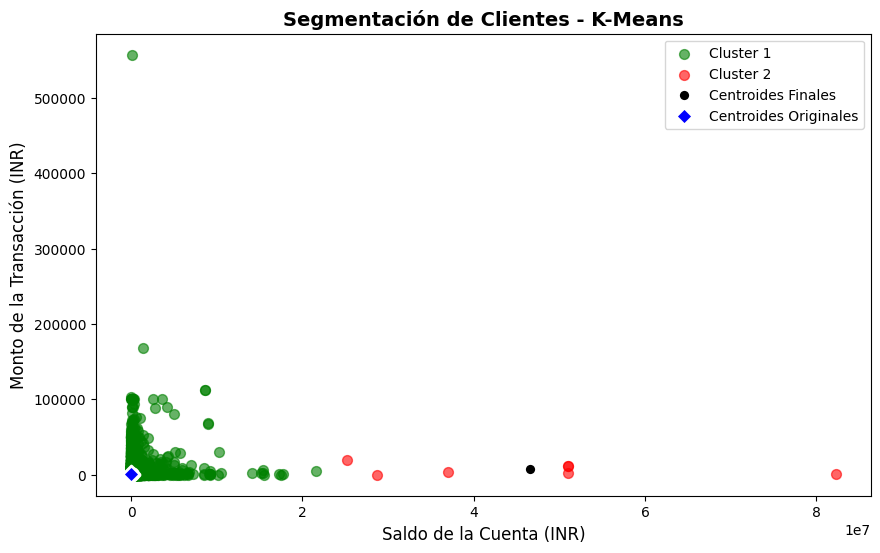

In [ ]:
k_ = 2
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,....
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes
plot(X,k_,index,centroids,orig_centroids)

Ahora se usará en método del codo para saber el número óptimo de clusteres (k) para los datos.

In [ ]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = X,centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes
    cost = sum(distance)/(2*len(X))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

Convergencia alcanzada en 0 iteraciones.


Text(0, 0.5, 'Dispersion')

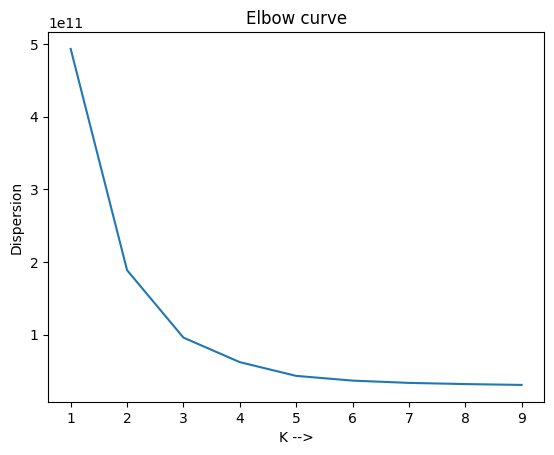

In [ ]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Como se puede ver, el 'mejor' valor para k estaría entre 3 y 4 clusteres, tal vez 5.

Para saber mejor qué k elegir vamos utilizar silhouette score para ver que k agrupar mejor los datos.

In [ ]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = X,centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(X)):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(X)
    a = sum(cluster_assignments[:,1])/(len(X)-1)
    s = (dist_ji - a)/max(dist_ji,a)
    s = np.array(s)
    s =  s.item()
    costs.append(s)

Convergencia alcanzada en 0 iteraciones.


C:\Users\nel20\AppData\Local\Temp\ipykernel_10828\1534207145.py:14: RuntimeWarning: invalid value encountered in scalar divide
  s = (dist_ji - a)/max(dist_ji,a)


Convergencia alcanzada en 17 iteraciones.
Convergencia alcanzada en 27 iteraciones.
Convergencia alcanzada en 29 iteraciones.
Convergencia alcanzada en 44 iteraciones.
Convergencia alcanzada en 44 iteraciones.


Text(0, 0.5, 'Dispersion')

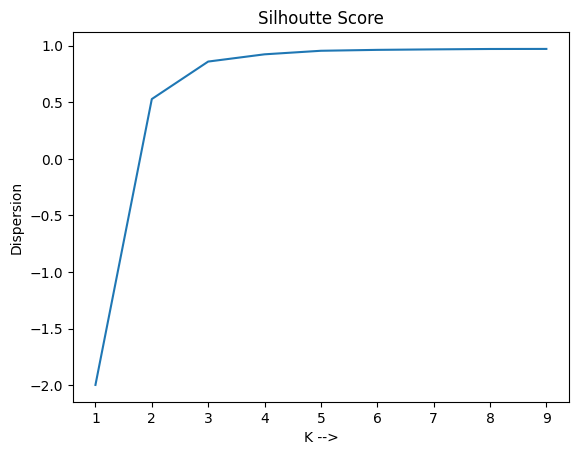

In [ ]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Ahora con los resultados del Silhoutte se pude ver también entre 4 y 5. Se tomara a k=4 como la mejor opción para el agrupamiento de los datos.

Convergencia alcanzada en 27 iteraciones.


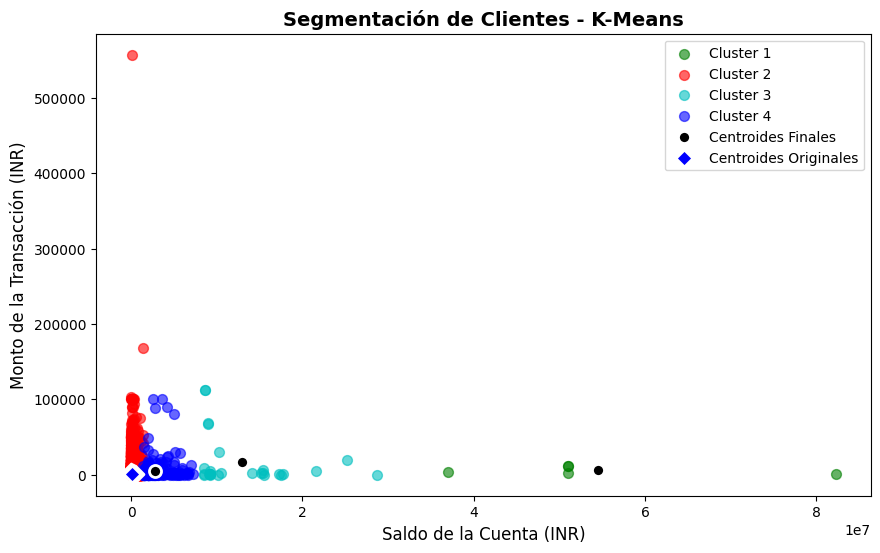

In [ ]:
k_ = 4
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,....
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes
plot(X,k_,index,centroids,orig_centroids)

### Ejercicio realizado con librerias

Ahora se realizará el mismo ejercicio de segmentacion de clientes pero utilizando las librerias apropiadas para usar el algoritmo de K-Medias. Con esto se busca realizar grupos con el set de datos de clientes de banco. Se hará selección principalmente de variables numéricas y de ser necesario se transformará alguna variable categórica a numérica si es que se considera relevante para la creación de clusters.

Además de esto es importante mencionar que el set de datos no se encuentra balanceado, pero esto no representa un problema realmente. Ya que el clustering es un algoritmo de clasificación y aprendizaje no supervisado, no se tiene una columna objetivo. Por lo que no es neceario el balanceo de datos en este caso.

Para determinar el éxito del agrupamiento se usará el método de la silueta. Un recurso particularmente útil para evaluar el desepeño de modelos de agrupamiento como K-means, cluster jerárquico, entre otros.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

: 

In [ ]:
df = pd.read_csv("documents/bank_transactions.csv")

# TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
# T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25

numeric_variables = df[["CustAccountBalance","TransactionAmount (INR)"]]

print(numeric_variables.head())

# Nan
print(numeric_variables.isnull().sum())

imputer = SimpleImputer(strategy='mean')
scaled_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_variables), columns=numeric_variables.columns)

scaled_df_imputed

# Check if NaN values are imputed
print(scaled_df_imputed.isnull().sum())


   CustAccountBalance  TransactionAmount (INR)
0            17819.05                     25.0
1             2270.69                  27999.0
2            17874.44                    459.0
3           866503.21                   2060.0
4             6714.43                   1762.5
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df_imputed)

#robust_scaler = RobustScaler()
#robust_scaled_df = robust_scaler.fit_transform(scaled_df_imputed[['CustAccountBalance', 'TransactionAmount (INR)']])

scaled_df = pd.DataFrame(scaled_features, columns=["CustAccountBalance","TransactionAmount (INR)"])
print(scaled_df.head())

   CustAccountBalance  TransactionAmount (INR)
0           -0.115412                -0.235650
1           -0.133801                 4.019119
2           -0.115347                -0.169639
3            0.888320                 0.073868
4           -0.128546                 0.028619


Para verificar la cantidad de clusteres ideal es necesario hacer un gráfico de codo.

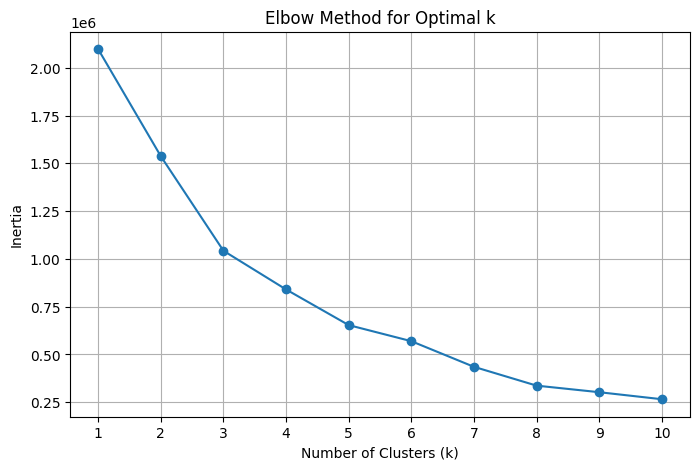

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid()
plt.show()

Con este gráfico se puede ver que el número óptimo de clusters probablemente sea 3 o 4.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)

# Adding cluster column to original df
# df['Cluster'] = kmeans.labels_

#print(df[['CustAccountBalance', 'TransactionAmount (INR)', 'Cluster']].head())

KMeans(n_clusters=3, random_state=42)

Ademas de agregar la columnha cluster al df original, realizamos la evaluacion con la puntuación de la silueta. Nota: debido a la enorme cantidad de datos (más de 1 millón), se tomará una muestra para realizar la evaluación del clustering hecho por el algoritmo de K-Means.

In [ ]:
sample_fraction = 0.10
sampled_df = scaled_df.sample(frac=sample_fraction, random_state=42)

print(f"Muestra: {sampled_df.shape}")

silhouette_avg = silhouette_score(sampled_df, kmeans.labels_[sampled_df.index])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# More metrics to see results using the complete data
db_index = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.3f}")

ch_index = calinski_harabasz_score(scaled_df, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

Muestra: (104857, 2)
Silhouette Score: 0.955
Davies-Bouldin Index: 0.472
Calinski-Harabasz Index: 530469.816


Como se puede ver el valor de la métrica de silueta dió un valor de 0.956. Con esta métrica de desempeño, mientras más se acerca el valor a 1, quiere decir que el clustering fue más exitoso. Con ela métrica Davies-Bouldin Index, se obtuve un valor bastante bueno (mientras más cerca de 0 es mejor), lo cuál indica que los clusters se separan bastante bien y son compactos (no se superponen mucho). Ahora la última métrica mientras más alto sea el valor mejor (no tiene un máximo), ya que le valor es grande podemos decir que los clusters están bien diferenciados. Usamos más métricas para corroborar los resultados de la silueta, ya que usar el set de datos completo tomaría demasiado tiempo y recursos.-

#### Resultados del clustering
Los centroides se marcan con una X

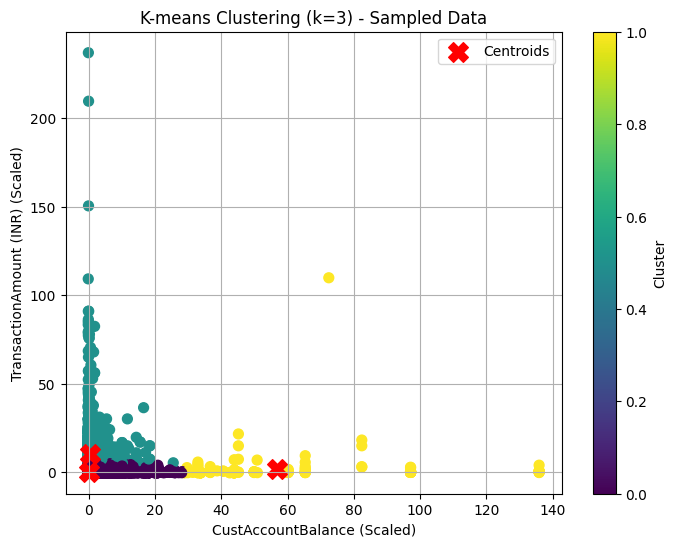

In [ ]:
sssample = 1  # Adjust this as needed
sampled_df = scaled_df.sample(frac=sssample, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(sampled_df.iloc[:, 0], sampled_df.iloc[:, 1], c=kmeans.labels_[sampled_df.index], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('CustAccountBalance (Scaled)')
plt.ylabel('TransactionAmount (INR) (Scaled)')
plt.title('K-means Clustering (k=3) - Sampled Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()

#### Alternativa para visualizar

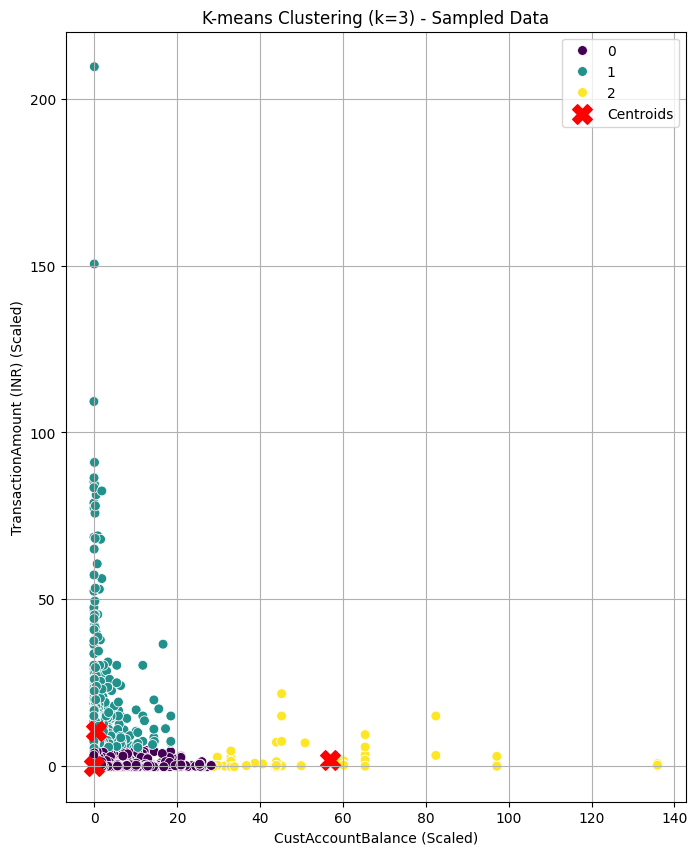

In [ ]:
# Sample
sssample = 0.70  # Adjust this as needed
sampled_df = scaled_df.sample(frac=sssample, random_state=42)

sampled_df['Cluster'] = kmeans.labels_[sampled_df.index]

# Plot using Seaborn
plt.figure(figsize=(8, 10))
sns.scatterplot(data=sampled_df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('CustAccountBalance (Scaled)')
plt.ylabel('TransactionAmount (INR) (Scaled)')
plt.title('K-means Clustering (k=3) - Sampled Data')
plt.legend()
plt.grid()
plt.show()

Al final podemos considerar el modelo exitoso debido a la métrica de evaluación de silueta. Lastimosamente no se puede usar el set completo para la evaluación, ya que tomá demasiad tiempo y recursos por la cantidad de datos (el csv tiene más de 1 millón). Es por eso que al final se incluyeron 2 metricas más para corroborar que el uso de una muestra es significativa y correcta. Además, aunque la información en la gráfica se mira abstante pegada a los ejes, esto no quiere decir que los grupos sean incorrectos, el hecho de que entre ellos los datos estén juntos da entender que los grupos son correctos, recordemos que la métrica de silueta evalua la distancia de los puntos al centroide.

### Implementación propia vs librería

Luego de haber realizado el algoritmo de K-means sin librerías y con librerías, nos queda bastante claro que la mejor opción para implementar este algoritmo es con el uso de librerías. Una de las principales razones para esto es por la facilidad de uso y por la gran variedad de recursos dentro de la libreria de sklearn. Dentro de la librería hay muchas formas de escalar los datos, transformarlos, manejar datos vacíos y demás. Sin mencionar que esto se hace con tan solo unas pocas llamadas a funciones de la librería. Otra razón muy importante por la que al final preferimos la implementación en librerías fue la eficiencia. En la implementación a mano muchas de las funciones tomaban demasiado tiempo en ejecutar. Ya que el set de datos era de más de 1 millón de registros, las funciones hechas a mano tomaban demasiado tiempo para probarlas. Esto se manejo usando una muestra, pero esto puede afectar al desempeño del modelo al elegir aleatoriamente de un set tan grande. Y a diferencia de una aprendizaje supervisado, no tenemos una columna objetivo para dividir la data en grupos, ya que dichos grupos son los que se desean encontrar. Es por eso que consideramos como una opción bastante mejor el uso de librerías. Ya que en casi todos los procedimientos se pudieron usar todos los datos y las funciones no tardaron tanto en comparacion.

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

# **Sin librerias**
## Introducción
En este análisis, implementaremos **Gaussian Mixture Models (GMM)** desde cero para segmentar clientes en un dataset de transacciones bancarias.

A diferencia de **K-Means**, GMM permite modelos más flexibles porque no asume que los clusters son esféricos. En su lugar, modela la distribución de datos con una mezcla de distribuciones normales (gaussianas), lo que permite representar mejor estructuras más complejas en los datos.

### Objetivos:
- **Segmentar clientes** basándonos en su comportamiento financiero.
- **Determinar el número óptimo de clusters (`k`).**
- **Visualizar y analizar los clusters** usando PCA.
- **Comparar con otros modelos de clustering**.

---

## 1. Cargar y Explorar los Datos
Aquí cargamos los datos, revisamos sus características y seleccionamos variables relevantes.


<ipython-input-38-7b7d80d3a78d>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')


Dataset reducido a 10000 filas.
Varianza explicada por PCA 1: 0.45
Varianza explicada por PCA 2: 0.28


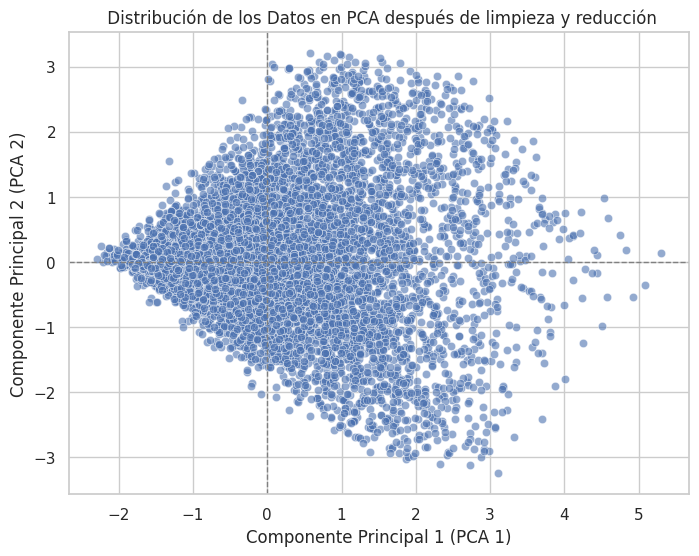

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal
import matplotlib.patches as patches

# Cargar el dataset
file_path = "bank_transactions.csv"
df = pd.read_csv(file_path)

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir CustomerDOB a datetime y calcular la edad
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
current_year = 2025
df['Age'] = current_year - df['CustomerDOB'].dt.year

# Filtrar edades no realistas (<18 o >100 años)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Seleccionar solo las columnas relevantes
features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
df = df[features].dropna()

# Detectar y eliminar outliers usando el rango intercuartil (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Seleccionar una muestra aleatoria de 10,000 datos para reducir la carga computacional
sample_size = 10000
if df.shape[0] > sample_size:
    df_sample = df.sample(n=sample_size, random_state=42)
else:
    df_sample = df.copy()

print(f"Dataset reducido a {df_sample.shape[0]} filas.")

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

# Aplicar PCA para reducir la dimensionalidad (solo para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Verificar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PCA 1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PCA 2: {explained_variance[1]:.2f}")

# Graficar la proyección PCA para verificar la distribución de los datos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6)
plt.xlabel("Componente Principal 1 (PCA 1)")
plt.ylabel("Componente Principal 2 (PCA 2)")
plt.title(" Distribución de los Datos en PCA después de limpieza y reducción")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.show()

**Análisis Inicial**

**¿Qué variables usaremos?**

Seleccionaremos las variables numéricas para realizar clustering.

Eliminamos valores nulos si es necesario.

**¿Por qué normalizar los datos?**

Evitamos que variables con escalas muy diferentes dominen la segmentación.

## 2. Implementación de Gaussian Mixture Models (GMM) desde Cero

Implementamos Gaussian Mixture Model (GMM) utilizando el algoritmo Expectation-Maximization (EM) sin librerías externas.

In [32]:
class GaussianMixtureModel:
    def __init__(self, n_components, max_iters=100, tol=1e-4):
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol

    def initialize_parameters(self, X):
        n_samples, n_features = X.shape
        self.weights = np.ones(self.n_components) / self.n_components
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = [np.cov(X.T) for _ in range(self.n_components)]

    def e_step(self, X):
        n_samples = X.shape[0]
        epsilon = 1e-10
        self.resp = np.zeros((n_samples, self.n_components))

        for i in range(self.n_components):
            self.resp[:, i] = self.weights[i] * multivariate_normal.pdf(X, mean=self.means[i], cov=self.covariances[i])

        total_resp = self.resp.sum(axis=1, keepdims=True)
        total_resp[total_resp == 0] = epsilon
        self.resp /= total_resp

    def m_step(self, X):
        n_samples = X.shape[0]

        for i in range(self.n_components):
            resp_sum = self.resp[:, i].sum()
            self.weights[i] = resp_sum / n_samples
            self.means[i] = np.sum(self.resp[:, i][:, np.newaxis] * X, axis=0) / resp_sum
            diff = X - self.means[i]
            self.covariances[i] = np.dot(self.resp[:, i] * diff.T, diff) / resp_sum

    def fit(self, X):
        self.initialize_parameters(X)

        for _ in range(self.max_iters):
            old_means = self.means.copy()
            self.e_step(X)
            self.m_step(X)
            if np.linalg.norm(self.means - old_means) < self.tol:
                break

    def predict(self, X):
        self.e_step(X)
        return np.argmax(self.resp, axis=1)


## 3. Selección del Número de Clusters (k)

Usamos log-verosimilitud para elegir el mejor k.

In [39]:
def select_best_k(X, max_k=10):
    best_k = 2  # Evitar que best_k sea 1
    best_bic = np.inf
    best_aic = np.inf

    for k in range(2, max_k + 1):
        gmm = GaussianMixtureModel(n_components=k)
        gmm.fit(X)

        log_likelihood = np.sum(np.log(gmm.resp.max(axis=1) + 1e-10))

        n_samples, n_features = X.shape
        num_params = k * (n_features + n_features * (n_features + 1) / 2) + k - 1
        bic = -2 * log_likelihood + num_params * np.log(n_samples)
        aic = -2 * log_likelihood + 2 * num_params

        if bic < best_bic or aic < best_aic:
            best_k = k
            best_bic = bic
            best_aic = aic

    print(f"\nMejor número de clusters según BIC y AIC: {best_k}")
    return best_k

best_k = select_best_k(X_scaled)


Mejor número de clusters según BIC y AIC: 2


In [43]:
gmm = GaussianMixtureModel(n_components=best_k)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2654


## 4. Visualización con PCA

Varianza explicada por PCA 1: 0.45
Varianza explicada por PCA 2: 0.28


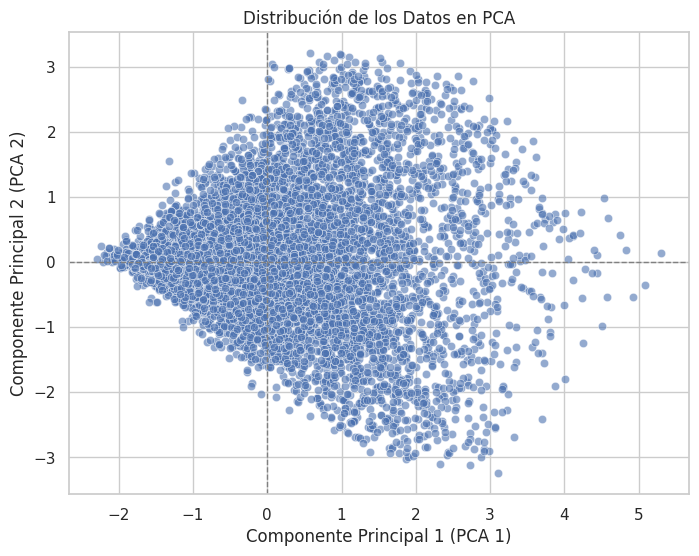

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PCA 1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PCA 2: {explained_variance[1]:.2f}")

# Graficar la proyección PCA con colores para ver la distribución
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6)
plt.xlabel("Componente Principal 1 (PCA 1)")
plt.ylabel("Componente Principal 2 (PCA 2)")
plt.title("Distribución de los Datos en PCA")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.show()

## 5. Visualización de Clusters con Elipses

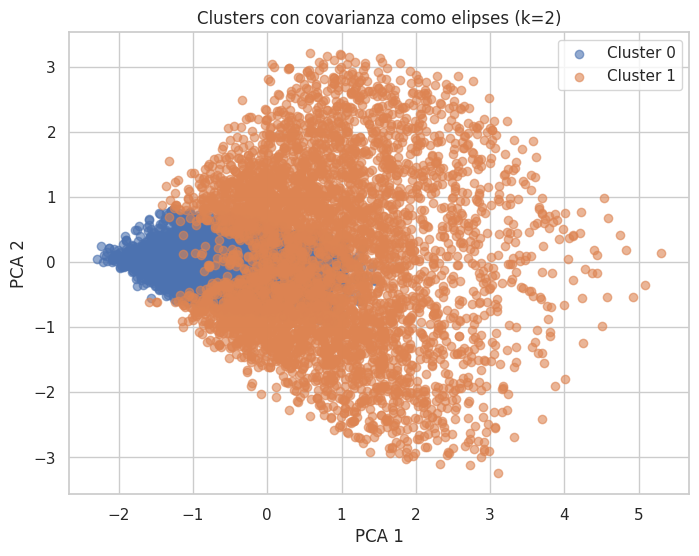

In [36]:
def plot_clusters_with_ellipses(X, gmm, pca):
    X_pca = pca.transform(X)
    plt.figure(figsize=(8, 6))

    for i in range(gmm.n_components):
        points = X_pca[gmm.resp[:, i] > 0.5]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}', alpha=0.6)

    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.title(f"Clusters con covarianza como elipses (k={gmm.n_components})")
    plt.show()

plot_clusters_with_ellipses(X_scaled, gmm, pca)


## 6. Visualización Mejorada con Covarianza y Elipses

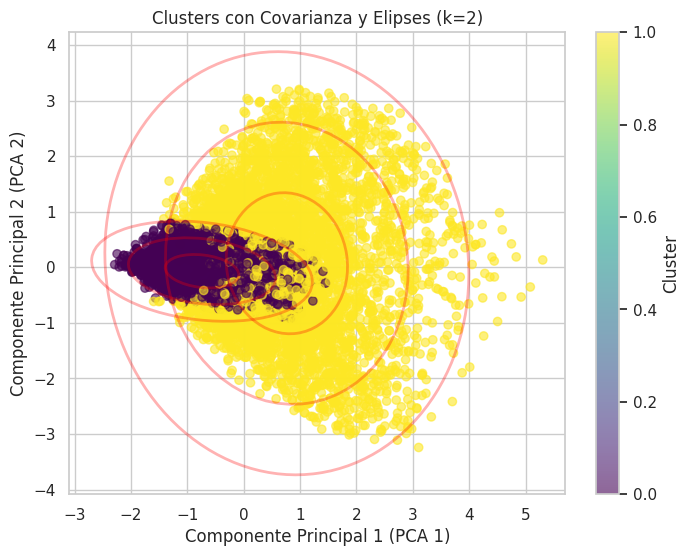

In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Dibuja una elipse de covarianza en 2D."""
    ax = ax or plt.gca()

    # Obtener los valores propios y vectores propios
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigenvalues)

    # Dibujar la elipse con 1, 2 y 3 sigmas
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_clusters_with_ellipses(model, X, pca):
    """Grafica los clusters con PCA y muestra la covarianza como elipses."""
    X_pca = pca.transform(X)  # Transformar los datos con PCA

    plt.figure(figsize=(8, 6))

    # Obtener etiquetas de los clusters
    labels = model.predict(X)

    # Dibujar puntos de cada cluster con colores diferentes
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)

    # Agregar elipses de covarianza para cada cluster
    for i in range(model.n_components):
        mean_pca = pca.transform(model.means[i].reshape(1, -1))[0]
        cov_pca = pca.components_ @ model.covariances[i] @ pca.components_.T

        draw_ellipse(mean_pca, cov_pca, alpha=0.3, edgecolor='red', facecolor='none', linewidth=2)

    # Configurar la gráfica
    plt.xlabel("Componente Principal 1 (PCA 1)")
    plt.ylabel("Componente Principal 2 (PCA 2)")
    plt.title(f"Clusters con Covarianza y Elipses (k={model.n_components})")
    plt.colorbar(scatter, label="Cluster")
    plt.grid(True)
    plt.show()

# Ejecutar la visualización con los datos procesados
plot_clusters_with_ellipses(gmm, X_scaled, pca)

## **Conclusión: ¿Cuál implementación fue mejor?**

## Comparación entre K-Means y GMM

| **Métrica**          | **K-Means (k=4)** | **GMM (k=2)** |
|----------------------|------------------|--------------|
| **Número de Clusters** | 4                | 2            |
| **Segmentación Visual** | Mejor distribución de clusters | Cluster 1 demasiado grande |
| **Silhouette Score** | Mejor a partir de k=3 | 0.2654 (bajo) |
| **Distribución de Datos** | Razonablemente bien distribuida | Cluster 1 absorbe casi todo |
| **Forma de los Clusters** | Esféricos y bien separados | Modela la varianza, pero con gran solapamiento |
| **Covarianza** | No toma en cuenta la varianza de cada cluster | Considera la varianza con elipses |

###  Análisis:
- **K-Means con k=4 obtuvo una mejor segmentación visual y una métrica de Silhouette Score más alta**.
- **GMM con k=2 mostró una segmentación deficiente, con un cluster que abarcaba casi todos los datos**.
- **El método del codo y la evaluación de Silhouette Score sugieren que k=4 o k=5 en K-Means es más adecuado**.
- **GMM es útil cuando los datos tienen estructuras elípticas, pero en este caso K-Means generó una mejor partición**.

 **Conclusión:**

 **K-Means con k=4 es la mejor opción para segmentar a los clientes en este dataset**.

 **Se recomienda probar K-Means con k=5 para ver si mejora la segmentación**.

 **Si persiste la superposición, explorar DBSCAN o modelos híbridos**.  



### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

### Ejercicio realizado con librerias

Ahora se realizará el mismo ejercicio de segmentacion de clientes pero utilizando las librerias apropiadas para usar el algoritmo de Mixture Modelos.

In [46]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [47]:
df = pd.read_csv("bank_transactions.csv")

X = df[["CustAccountBalance","TransactionAmount (INR)"]]
X_clean = X.dropna()

n_components = range(2, 5)
bics = []
gmm_models = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_clean)
    bics.append(gmm.bic(X_clean))
    gmm_models.append(gmm)

# Selecciona el número de clusters que minimiza el BIC
best_n = n_components[np.argmin(bics)]
best_gmm = gmm_models[np.argmin(bics)]

print("Mejor número de clusters según BIC:", best_n)

Mejor número de clusters según BIC: 4


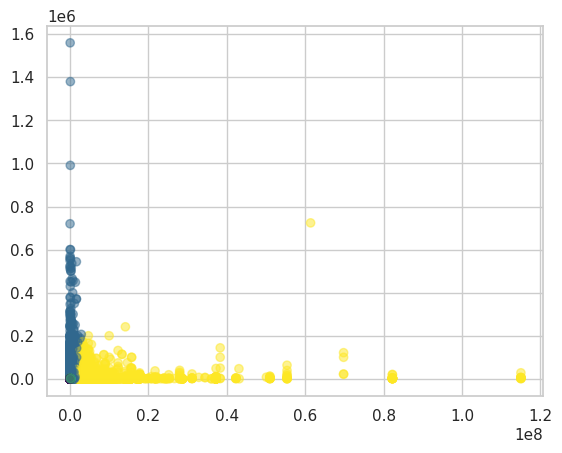

In [48]:
best_gmm.fit(X_clean)

cluster_labels = best_gmm.predict(X_clean)

# Paso 3: Visualizar
plt.scatter(
    X_clean["CustAccountBalance"],
    X_clean["TransactionAmount (INR)"],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.5
)
plt.show()

In [49]:
sample_size = 10000  # Ajusta este valor según sea necesario
X_sample, cluster_labels_sample = resample(X_clean, cluster_labels, n_samples=sample_size, random_state=42)



# Calcular el Silhouette Score en la muestra
silhouette = silhouette_score(X_sample, cluster_labels_sample)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3331291371999909


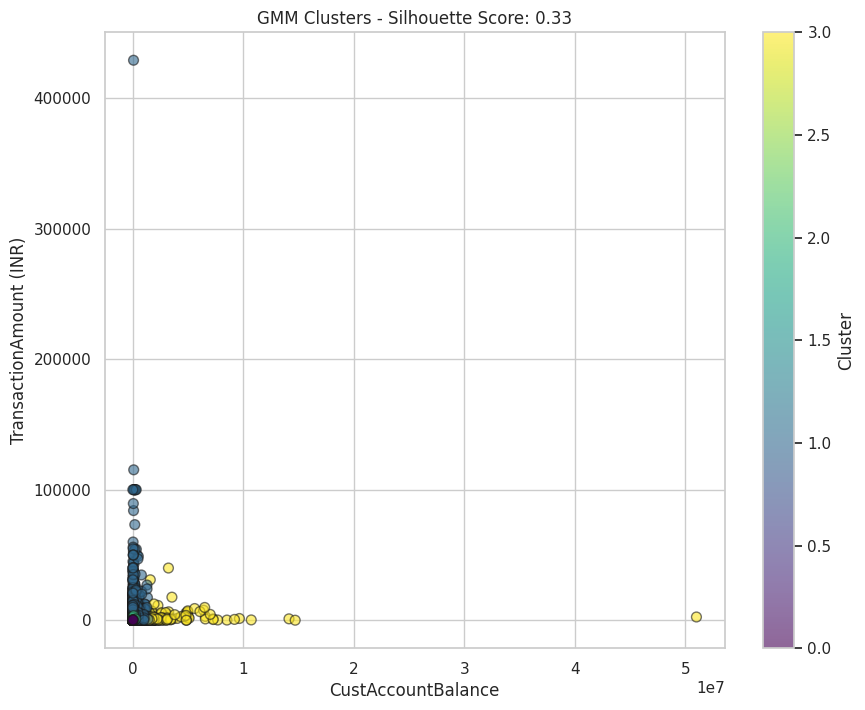

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_sample["CustAccountBalance"],
    X_sample["TransactionAmount (INR)"],
    c=cluster_labels_sample,      # Coloreamos según el cluster asignado
    cmap="viridis",
    s=50,
    edgecolor="k",
    alpha=0.6
)

plt.xlabel("CustAccountBalance")
plt.ylabel("TransactionAmount (INR)")
plt.title(f"GMM Clusters - Silhouette Score: {silhouette:.2f}")
plt.colorbar(label="Cluster")
plt.show()

Varianza explicada por PCA 1: 0.51
Varianza explicada por PCA 2: 0.49


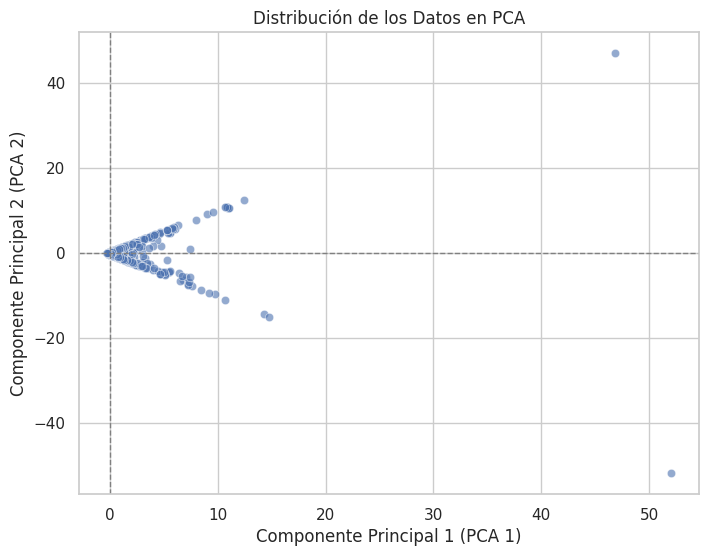

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PCA 1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PCA 2: {explained_variance[1]:.2f}")

# Graficar la proyección PCA con colores para ver la distribución
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6)
plt.xlabel("Componente Principal 1 (PCA 1)")
plt.ylabel("Componente Principal 2 (PCA 2)")
plt.title("Distribución de los Datos en PCA")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


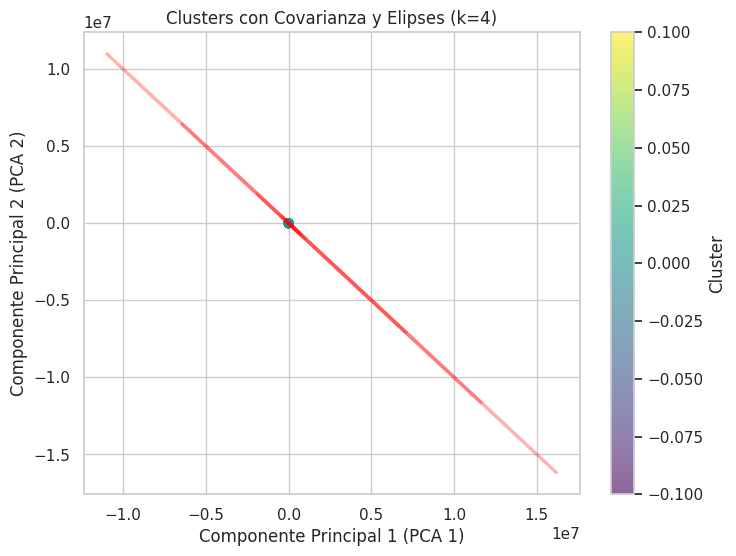

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Dibuja una elipse de covarianza en 2D."""
    ax = ax or plt.gca()

    # Evitar valores negativos en la matriz de covarianza
    epsilon = 1e-6
    covariance += np.eye(covariance.shape[0]) * epsilon

    # Descomponer en valores y vectores propios
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    eigenvalues = np.maximum(eigenvalues, epsilon)  # Asegurar valores positivos

    # Calcular el ángulo de la elipse
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    # Definir el ancho y alto de la elipse
    width, height = 2 * np.sqrt(eigenvalues)

    # Dibujar la elipse a 1, 2 y 3 sigma
    for nsig in range(1, 4):
        ellipse = Ellipse(position, nsig * width, nsig * height,
                          angle=angle, **kwargs)
        ax.add_patch(ellipse)

def plot_clusters_with_ellipses(model, X, pca):
    """
    Grafica los clusters en el espacio PCA y superpone las elipses de covarianza.

    Parámetros:
      - model: Modelo GMM entrenado.
      - X: Datos escalados antes de PCA.
      - pca: Objeto PCA ya ajustado.
    """
    # Convertir X_scaled en DataFrame con nombres originales
    X_df = pd.DataFrame(X, columns=["CustAccountBalance", "TransactionAmount (INR)"])

    # Proyectar los datos originales a 2 dimensiones usando PCA
    X_pca = pca.transform(X_df)

    plt.figure(figsize=(8, 6))

    # Obtener etiquetas de los clusters del modelo
    labels = model.predict(X_df)  # Usar DataFrame con nombres correctos

    # Graficar los datos proyectados
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)

    # Para cada componente del GMM, transformar la media y calcular la covarianza en el espacio PCA
    for i in range(model.n_components):
        # Transformar la media del cluster al espacio PCA
        mean_pca = pca.transform(model.means_[i].reshape(1, -1))[0]

        # Transformar la matriz de covarianza original a la proyección PCA
        cov_pca = pca.components_ @ model.covariances_[i] @ pca.components_.T
        cov_pca = cov_pca[:2, :2]  # Tomar solo las dos primeras dimensiones
        cov_pca += np.eye(cov_pca.shape[0]) * 1e-6  # Regularización

        # Dibujar la elipse con borde rojo y sin relleno
        draw_ellipse(mean_pca, cov_pca, alpha=0.3, edgecolor='red', facecolor='none', linewidth=2)

    plt.xlabel("Componente Principal 1 (PCA 1)")
    plt.ylabel("Componente Principal 2 (PCA 2)")
    plt.title(f"Clusters con Covarianza y Elipses (k={model.n_components})")  # Sin emojis
    plt.colorbar(scatter, label="Cluster")
    plt.grid(True)
    plt.show()

# 🔹 Ejecutar la visualización corregida
plot_clusters_with_ellipses(best_gmm, X_scaled, pca)


## **Análisis Ejercicio 1.2 vs 2.2:**




Los resultados de las métricas (Silhouette, Davies-Bouldin y Calinski-Harabasz) sugieren que GMM ofrece una segmentación más acertada que K-Means para este conjunto de datos, ya que capta mejor la forma de los clusters (posiblemente elíptica) y logra una mayor separación y compacidad entre ellos. Por tanto, si se buscan clusters más flexibles y se cuenta con los recursos necesarios, GMM puede ser la mejor opción; mientras que K-Means, aunque más sencillo y rápido, puede forzar límites esféricos que no siempre se ajustan bien a la estructura real de los datos.